<a href="https://colab.research.google.com/github/hxtruong/greatmaps-vietbando/blob/master/GMap_VietBanDo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [0]:
# !cd gdrive/My\ Drive/VietBanDo
# !pwd

In [0]:
link = "/content/gdrive/My Drive/VietBanDo/WayPoint_20190801_201908020946.csv"
# Note: set param encoding = 'latin1'
logs = pd.read_csv(link,encoding='latin1')

In [6]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599975 entries, 0 to 599974
Data columns (total 8 columns):
eventdate      599975 non-null object
vehicle        599975 non-null object
datetime       599975 non-null object
speed          599975 non-null float64
longitude      599975 non-null float64
latitude       599975 non-null float64
heading        599975 non-null float64
vehicleType    599975 non-null int64
dtypes: float64(4), int64(1), object(3)
memory usage: 36.6+ MB


In [7]:
logs.describe()

,speed,longitude,latitude,heading,vehicleType
count,599975.000000,599975.000000,599975.000000,599975.000000,599975.000000
mean,6.023258,106.696958,10.775069,115.869299,156.182174
std,10.729775,0.008335,0.011836,113.598963,215.934555
min,0.000000,106.681669,10.753519,-179.000000,0.000000
25%,0.000000,106.690150,10.764940,0.000000,0.000000
50%,0.000000,106.697190,10.775834,108.000000,0.000000
75%,9.000000,106.703350,10.784412,187.050000,300.000000
max,132.000000,106.715053,10.796934,12342.000000,900.000000


In [8]:
logs.head(5)

,eventdate,vehicle,datetime,speed,longitude,latitude,heading,vehicleType
0,01/08/2019,5.10E+25,01/08/2019 7:41:40,13.0,106.681671,10.777759,98.0,0
1,01/08/2019,5.10E+25,01/08/2019 7:58:40,33.0,106.681671,10.755480,0.0,700
2,01/08/2019,5.10E+25,01/08/2019 8:04:10,11.0,106.681671,10.765283,180.0,300
3,01/08/2019,5.10E+25,01/08/2019 8:13:10,27.0,106.681671,10.790426,0.0,0
4,01/08/2019,5.10E+25,01/08/2019 8:19:10,21.0,106.681671,10.796104,0.0,0


In [9]:
logs.sample(5)

,eventdate,vehicle,datetime,speed,longitude,latitude,heading,vehicleType
493254,01/08/2019,51H10083,01/08/2019 1:25:52,25.0,106.706413,10.772686,184.0,0
263651,01/08/2019,51F76467,01/08/2019 9:15:19,0.0,106.708065,10.764547,50.0,300
87842,01/08/2019,51B22330,01/08/2019 12:23:04,0.0,106.682907,10.788955,342.0,0
277849,01/08/2019,51F88233,01/08/2019 14:15:19,0.0,106.702553,10.778869,180.0,300
94747,01/08/2019,51B25123,01/08/2019 19:16:17,0.0,106.683883,10.782942,0.0,0


In [94]:
# convert datetime to datetime in pandas
logs['datetime'] = pd.to_datetime(logs['datetime'])
logs.sample(5)

,eventdate,vehicle,datetime,speed,longitude,latitude,heading,vehicleType
363984,01/08/2019,51G43096,2019-01-08 18:26:09,0.0,106.709420,10.789987,0.0,300
308735,01/08/2019,51G08083,2019-01-08 12:15:47,0.0,106.685501,10.769650,279.3,300
287337,01/08/2019,51F93548,2019-01-08 09:40:39,0.0,106.709755,10.795163,180.0,0
521690,01/08/2019,57M3150,2019-01-08 06:09:43,41.0,106.708496,10.762405,0.0,700
332878,01/08/2019,51G27312,2019-01-08 05:47:42,0.0,106.697800,10.767458,237.0,0


In [95]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263091 entries, 381 to 599859
Data columns (total 8 columns):
eventdate      263091 non-null object
vehicle        263091 non-null object
datetime       263091 non-null datetime64[ns]
speed          263091 non-null float64
longitude      263091 non-null float64
latitude       263091 non-null float64
heading        263091 non-null float64
vehicleType    263091 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 28.1+ MB


In [96]:
# check null in data frame
logs.isnull().sum()

eventdate      0
vehicle        0
datetime       0
speed          0
longitude      0
latitude       0
heading        0
vehicleType    0
dtype: int64

#### Remove vehicle appear less than 50 times

In [10]:
logs['vehicle'].value_counts()

51B27866     296
51G59860     291
59U124798    287
51G77157     268
51G04500     258
51B17324     255
51G33790     255
65A19359     251
71A04686     245
51C67871     245
54X1113      244
51B17924     243
51G67050     233
51G56199     226
51A39524     225
51G24023     221
51A50529     213
51G37237     212
51B17125     212
80B5464      209
51B05053     209
51G30518     206
54X6582      202
51G56050     199
80B5487      195
51F23643     195
51F23560     193
51G39585     192
51G48006     192
51G65871     191
            ... 
51B28044       1
51H52633       1
51B16888       1
51C85634       1
50LD10568      1
51B24497       1
71C07667       1
51D44982       1
51D45109       1
51G68785       1
51C26346       1
51D32145       1
51D22008       1
64A05247       1
51F77377       1
51F96245       1
51B28667       1
61A06231       1
50LD11870      1
51D20896       1
51C61535       1
51E20115       1
60A22922       1
51E03892       1
50LD07979      1
51C50275       1
15C00456       1
60C42908      

In [11]:
logs[(logs['vehicle']=='5.10E+25') | (logs['vehicle']=='5.10E+26')].sample(5)

,eventdate,vehicle,datetime,speed,longitude,latitude,heading,vehicleType
9,01/08/2019,5.10E+25,01/08/2019 9:10:40,0.0,106.681694,10.777658,180.0,300
42,01/08/2019,5.10E+26,01/08/2019 16:47:09,25.0,106.681755,10.770230,180.0,0
43,01/08/2019,5.10E+26,01/08/2019 17:04:59,35.0,106.681755,10.791761,313.0,300
13,01/08/2019,5.10E+25,01/08/2019 9:35:10,0.0,106.681702,10.782570,181.4,0
17,01/08/2019,5.10E+25,01/08/2019 11:13:40,0.0,106.681705,10.790595,188.0,300


In [12]:
logs[logs['speed']==0].sample(5)

,eventdate,vehicle,datetime,speed,longitude,latitude,heading,vehicleType
323647,01/08/2019,51G21555,01/08/2019 16:35:45,0.0,106.697448,10.789316,74.0,0
316233,01/08/2019,51G14264,01/08/2019 9:32:55,0.0,106.710311,10.754353,166.0,300
45008,01/08/2019,51A51034,01/08/2019 13:19:15,0.0,106.691910,10.764634,180.0,0
254405,01/08/2019,51F69856,01/08/2019 6:09:10,0.0,106.702430,10.778155,132.0,0
211549,01/08/2019,51F42785,01/08/2019 10:38:20,0.0,106.708580,10.764391,0.0,300


In [33]:
logs.groupby(by='vehicle').size().reset_index().loc[:5]

,vehicle,0
0,12A07712,3
1,14A28987,12
2,14A32821,20
3,15A17185,2
4,15A20924,23
5,15A25034,9


In [0]:
STANDARD_TIMES = 50

In [44]:
# Remove all vehicle appear less than STANDARD_TIMES times
# logs.drop(logs['vehicle'].index)
vehicleCount = logs.groupby(by='vehicle').size().reset_index()
rmIndex = vehicleCount[vehicleCount[0]<STANDARD_TIMES].index
vehicleCount.drop(index=rmIndex, inplace=True)
vehicleCount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2864 entries, 22 to 37265
Data columns (total 2 columns):
vehicle    2864 non-null object
0          2864 non-null int64
dtypes: int64(1), object(1)
memory usage: 67.1+ KB


In [45]:
vehicleCount['vehicle'].sample(5)

29433     54Y6949
26837    51H00921
19621    51G17455
23815    51G63203
6555     51C14069
Name: vehicle, dtype: object

In [0]:
qualityVehicle = vehicleCount['vehicle'].tolist()

In [71]:
logs[~logs['vehicle'].isin(qualityVehicle)]['vehicle'].value_counts().head(5)

Series([], Name: vehicle, dtype: int64)

In [61]:
# Remove all vehicle don't have enough appear more than STANDARD_TIMES times
logs.drop(logs[~logs['vehicle'].isin(qualityVehicle)].index, inplace=True)
print(logs['vehicle'].value_counts().sample(5))
print(logs.info())


51G58510      70
29B10307D    110
67C04703      88
61A62559      71
51G79616     102
Name: vehicle, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 263091 entries, 381 to 599859
Data columns (total 8 columns):
eventdate      263091 non-null object
vehicle        263091 non-null object
datetime       263091 non-null object
speed          263091 non-null float64
longitude      263091 non-null float64
latitude       263091 non-null float64
heading        263091 non-null float64
vehicleType    263091 non-null int64
dtypes: float64(4), int64(1), object(3)
memory usage: 18.1+ MB
None


#### Remove all vehicle has `speed = 0` and same coordinate

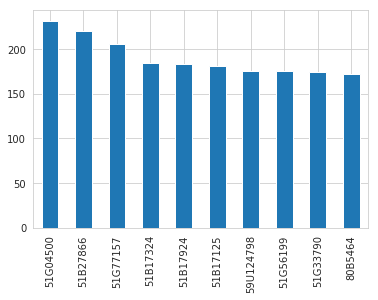

In [60]:
logs[logs['speed']==0]['vehicle'].value_counts().head(10).plot(kind='bar')

In [62]:
logs.sample(5)

,eventdate,vehicle,datetime,speed,longitude,latitude,heading,vehicleType
553867,01/08/2019,62A10601,01/08/2019 14:15:21,0.0,106.698547,10.781005,262.0,0
327828,01/08/2019,51G24064,01/08/2019 3:01:00,35.0,106.703300,10.782920,0.0,0
148683,01/08/2019,51D02873,01/08/2019 6:35:00,0.0,106.705268,10.782190,0.0,0
15501,01/08/2019,50A01001,01/08/2019 8:49:20,8.0,106.700088,10.773200,160.0,700
388311,01/08/2019,51G53559,01/08/2019 3:25:56,0.0,106.697908,10.767523,0.0,300


In [74]:
logs.groupby(by=['vehicle','speed', 'latitude','longitude']).size()

vehicle    speed  latitude   longitude 
15B02192   0.0    10.755776  106.682510    1
                  10.763719  106.682365    1
                  10.763900  106.682420    2
                  10.764361  106.682327    7
                  10.764620  106.682503    1
                  10.764780  106.682503    1
                  10.765000  106.682503    1
                  10.765920  106.682426    1
                  10.766325  106.682465    1
                  10.770347  106.682320    1
                  10.775639  106.682549    1
                  10.775777  106.682383    2
                  10.776085  106.682556    1
                  10.776087  106.682556    2
                  10.776337  106.682357    3
                  10.777680  106.682500    3
                  10.779957  106.682375    1
                  10.780417  106.682427    1
                  10.782851  106.682404    1
                  10.782879  106.682502    1
                  10.782888  106.682525    1
               

In [92]:
temp = logs[(logs['vehicle']=='15B02192') & (logs['speed']==0)]
temp.sample(5)

,eventdate,vehicle,datetime,speed,longitude,latitude,heading,vehicleType
390,01/08/2019,15B02192,01/08/2019 2:18:53,0.0,106.682327,10.764361,218.0,0
419,01/08/2019,15B02192,01/08/2019 7:23:09,0.0,106.682388,10.786953,0.0,300
450,01/08/2019,15B02192,01/08/2019 14:31:28,0.0,106.682500,10.777680,0.0,0
484,01/08/2019,15B02192,01/08/2019 21:27:11,0.0,106.682549,10.775639,180.0,300
491,01/08/2019,15B02192,01/08/2019 22:55:13,0.0,106.682564,10.790963,180.0,300


In [93]:
temp

,eventdate,vehicle,datetime,speed,longitude,latitude,heading,vehicleType
385,01/08/2019,15B02192,2019-01-08 01:00:51,0.0,106.682320,10.770347,180.0,300
386,01/08/2019,15B02192,2019-01-08 01:17:21,0.0,106.682320,10.783553,180.0,0
388,01/08/2019,15B02192,2019-01-08 01:32:21,0.0,106.682327,10.764361,218.0,0
389,01/08/2019,15B02192,2019-01-08 01:47:21,0.0,106.682327,10.764361,218.0,0
390,01/08/2019,15B02192,2019-01-08 02:18:53,0.0,106.682327,10.764361,218.0,0
391,01/08/2019,15B02192,2019-01-08 02:23:53,0.0,106.682327,10.764361,218.0,0
392,01/08/2019,15B02192,2019-01-08 02:54:38,0.0,106.682327,10.764361,218.0,0
393,01/08/2019,15B02192,2019-01-08 03:04:38,0.0,106.682327,10.764361,218.0,0
394,01/08/2019,15B02192,2019-01-08 03:10:59,0.0,106.682327,10.764361,218.0,0
396,01/08/2019,15B02192,2019-01-08 03:21:41,0.0,106.682327,10.787040,0.0,300
